In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()  # head method shows only first 5 rows

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [5]:
# feature names as an Index (panda object including a list of column names and dtype)
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [6]:
# y includes our labels and x includes our features
y = data['diagnosis']                   # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

Number of Benign:  357
Number of Malignant :  212


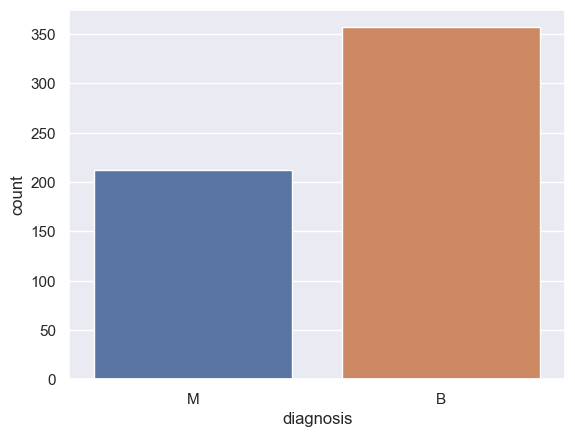

In [7]:
sns.set(style="darkgrid")
ax = sns.countplot(x = y)       # M = 212, B = 357
B, M = y.value_counts(sort=True) #sort=True (default) in order to be sure B, M are in the right order (alphabetical)
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [8]:
#check if there is a NaN value in our data frame x, a False indicates there are no missing values
x.isnull().values.any()

False

In [9]:
x.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [10]:
data = x
data_normal = (data - data.mean()) / (data.std())              # process of normalization by standardization

In [11]:
def violin_plot(beginning,end):
    data = pd.concat([y,data_normal.iloc[:,beginning:end]],axis=1)
    data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')
    plt.figure(figsize=(10,10))
    sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
    plt.xticks(rotation=45)

In [12]:
# first ten features
violin_plot(0,10)

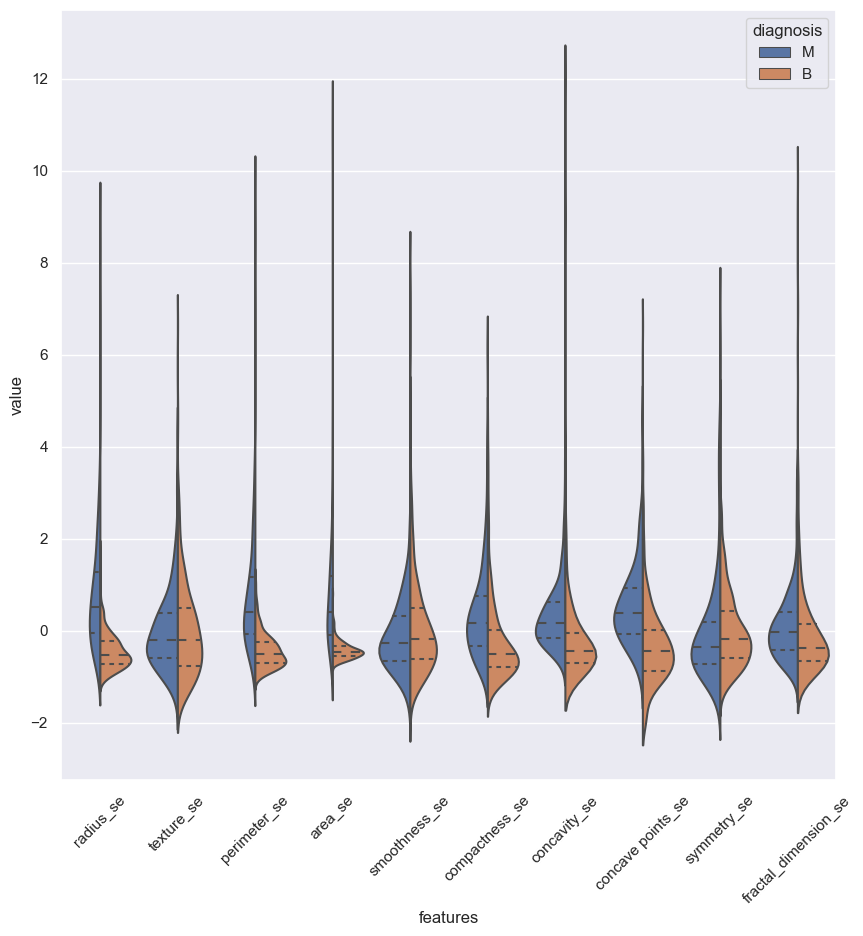

In [13]:
# Second ten features
violin_plot(10,20)

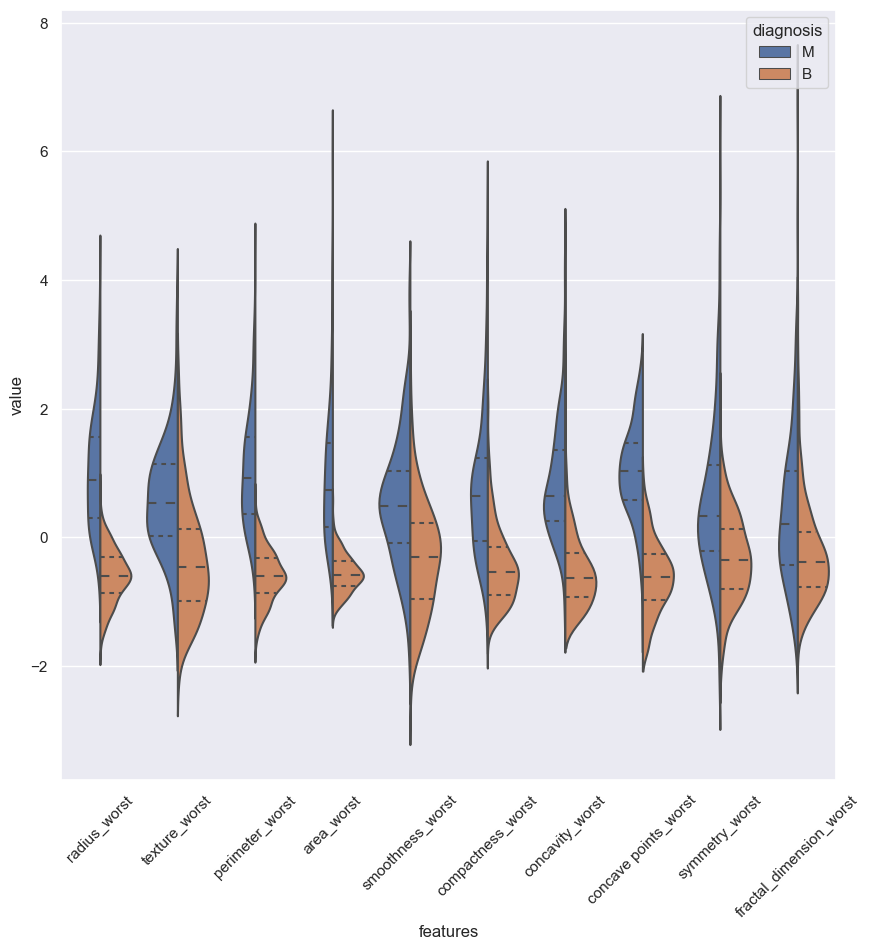

In [14]:
# Third ten features
violin_plot(20,31)

In [15]:
def joint_plot(feature1, feature2):
    """ I have a FutureWarning on this function, anyone knows how to get rid of it ?"""
    sns.jointplot(x=feature1, y=feature2, kind="reg", color="#ce1414", data=x)

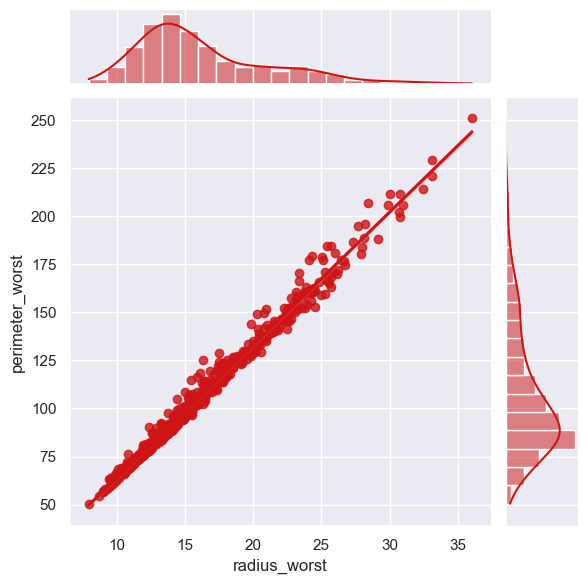

In [16]:
joint_plot("radius_worst","perimeter_worst")

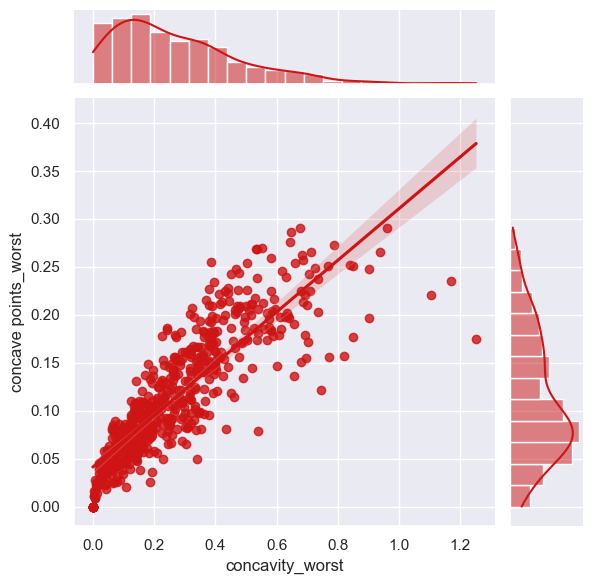

In [17]:
joint_plot("concavity_worst","concave points_worst")

<AxesSubplot:>

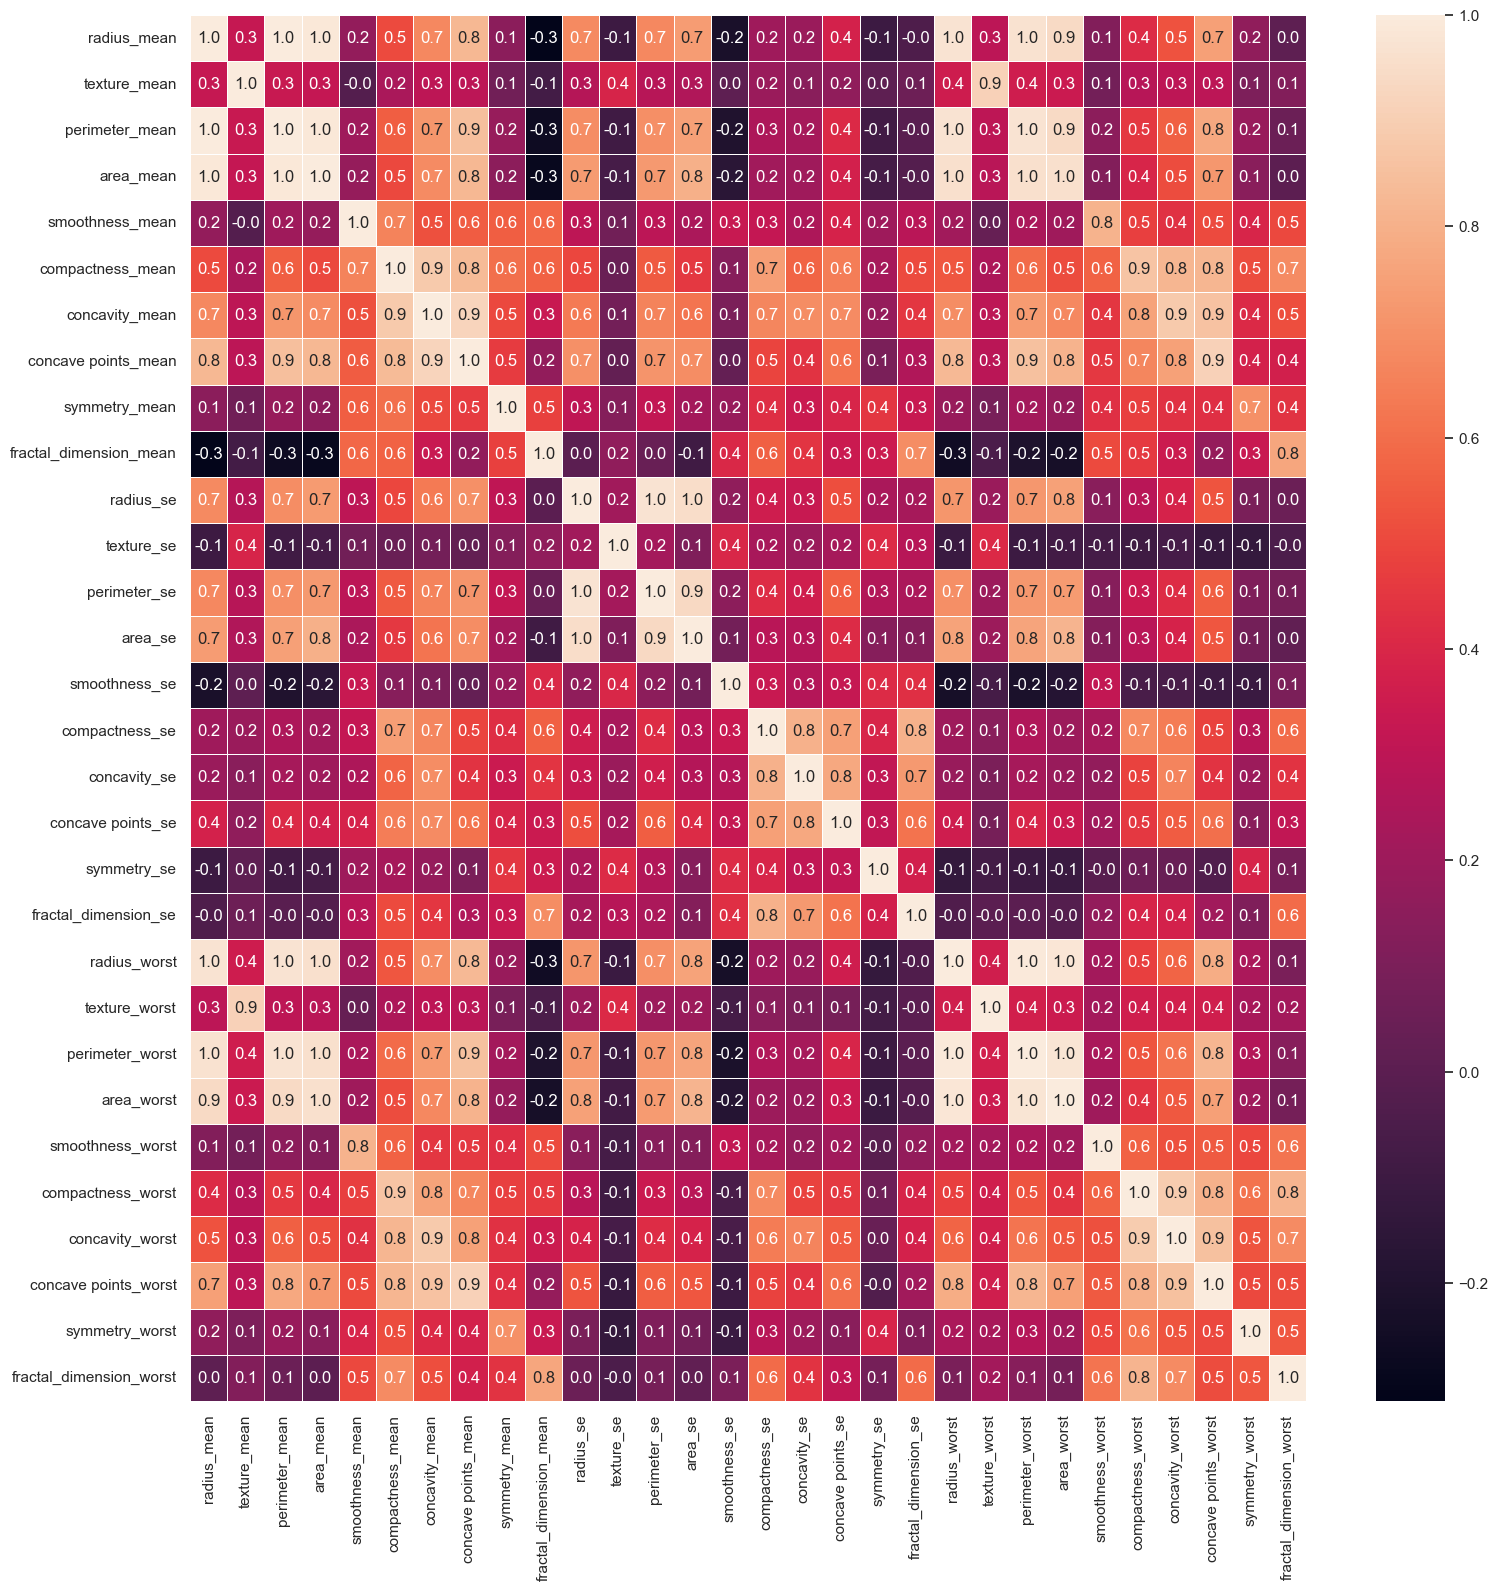

In [18]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
import numpy as np

# Load the breast cancer wisconsin dataset into a Pandas DataFrame object
df = pd.read_csv('breast_cancer_data.csv')

y = df['diagnosis'].replace({'B': 0, 'M': 1}).values

mylist = ['Unnamed: 32', 'id', 'diagnosis']

data = df.drop(mylist, axis=1)
scaler = MinMaxScaler()
X = scaler.fit_transform(data)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the random forest classifier with 1000 trees
rf = RandomForestClassifier(n_estimators=500, random_state=42)

# fit the model on the training data
rf.fit(X_train, y_train)
print("Number of estimators:", len(rf.estimators_))

feature_names = data.columns.tolist()

rules = ''
for i, dt in enumerate(rf.estimators_):
    rules += f"Rules for tree {i}:\n"
    rules += export_text(dt, feature_names=feature_names) + '\n'

# Display the decision tree rules
print(rules)

# Test rules
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# sum up the number of nodes in each decision tree in the forest
num_nodes = sum([estimator.tree_.node_count for estimator in rf.estimators_])

# print the number of nodes
print("Number of decisions:", num_nodes)


Number of estimators: 500
Rules for tree 0:
|--- concave points_worst <= 0.45
|   |--- radius_se <= 0.16
|   |   |--- area_worst <= 0.17
|   |   |   |--- class: 0.0
|   |   |--- area_worst >  0.17
|   |   |   |--- smoothness_se <= 0.11
|   |   |   |   |--- compactness_worst <= 0.25
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- compactness_worst >  0.25
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- smoothness_se >  0.11
|   |   |   |   |--- class: 1.0
|   |--- radius_se >  0.16
|   |   |--- fractal_dimension_mean <= 0.37
|   |   |   |--- class: 1.0
|   |   |--- fractal_dimension_mean >  0.37
|   |   |   |--- class: 0.0
|--- concave points_worst >  0.45
|   |--- radius_mean <= 0.28
|   |   |--- concave points_se <= 0.29
|   |   |   |--- concavity_se <= 0.08
|   |   |   |   |--- class: 0.0
|   |   |   |--- concavity_se >  0.08
|   |   |   |   |--- class: 1.0
|   |   |--- concave points_se >  0.29
|   |   |   |--- class: 0.0
|   |--- radius_mean >  0.28
|   |   |--- smoot

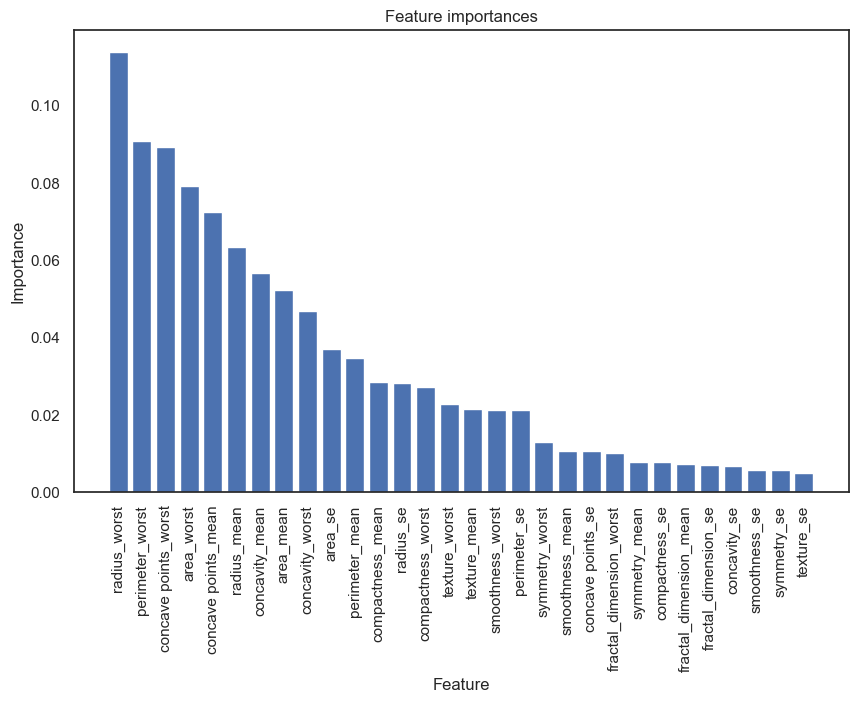

Feature ranking:
1. feature radius_worst (0.11382619391358509)
2. feature perimeter_worst (0.09066648016391053)
3. feature concave points_worst (0.08921407848492378)
4. feature area_worst (0.07906782782440627)
5. feature concave points_mean (0.0721787024455473)
6. feature radius_mean (0.06332665534173385)
7. feature concavity_mean (0.056556666915383455)
8. feature area_mean (0.05209977224022449)
9. feature concavity_worst (0.04675775813051021)
10. feature area_se (0.03687671321592763)
11. feature perimeter_mean (0.034607908667246993)
12. feature compactness_mean (0.02841893184293259)
13. feature radius_se (0.028176440570274765)
14. feature compactness_worst (0.027098157878606647)
15. feature texture_worst (0.022510858751268084)
16. feature texture_mean (0.021274862940657148)
17. feature smoothness_worst (0.021141798836524662)
18. feature perimeter_se (0.02100093128086703)
19. feature symmetry_worst (0.012855117647911666)
20. feature smoothness_mean (0.010493343031683266)
21. feature co

In [16]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Load the breast cancer wisconsin dataset into a Pandas DataFrame object
df = pd.read_csv('breast_cancer_data.csv')

# Convert diagnosis column to binary 0/1 values
y = df['diagnosis'].replace({'B': 0, 'M': 1}).values

# Drop columns that are not useful for prediction
df = df.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)

# Create an ExtraTreesClassifier object
et = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit the ExtraTreesClassifier on the dataset
et.fit(df, y)

# Get the feature importances
importances = et.feature_importances_

# Sort the features in descending order of importance
indices = importances.argsort()[::-1]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(df.shape[1]), importances[indices])
plt.xticks(range(df.shape[1]), df.columns[indices], rotation=90)
plt.title("Feature importances")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.show()

# Print the feature ranking
print("Feature ranking:")
for f in range(df.shape[1]):
    print(f"{f+1}. feature {df.columns[indices[f]]} ({importances[indices[f]]})")
    



    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


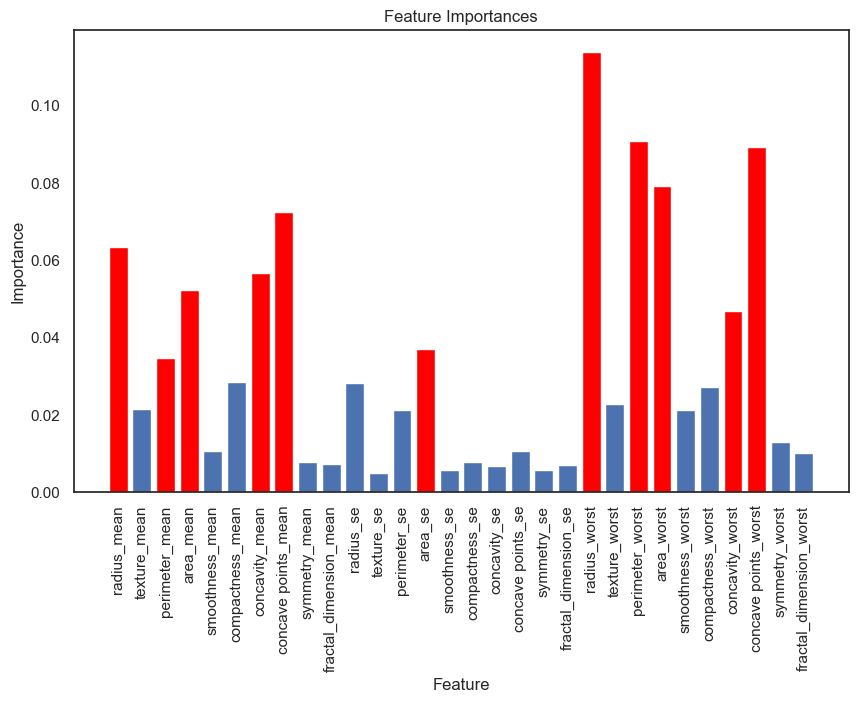

Selected features:
radius_mean
perimeter_mean
area_mean
concavity_mean
concave points_mean
area_se
radius_worst
perimeter_worst
area_worst
concavity_worst
concave points_worst


In [15]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# Load the breast cancer wisconsin dataset into a Pandas DataFrame object
df = pd.read_csv('breast_cancer_data.csv')

# Convert diagnosis column to binary 0/1 values
y = df['diagnosis'].replace({'B': 0, 'M': 1}).values

# Drop columns that are not useful for prediction
df = df.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)

# Create an ExtraTreesClassifier object
et = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit the ExtraTreesClassifier on the dataset
et.fit(df, y)

# Use the ExtraTreesClassifier to select the most important features
sfm = SelectFromModel(et, prefit=True)

# Transform the dataset to include only the most important features
X_new = sfm.transform(df)

# Get the feature importances
importances = et.feature_importances_

# Get the feature names
feature_names = df.columns.values

# Use the sfm object to get the mask of the selected features
support = sfm.get_support()

# Get the names of the selected features
selected_feature_names = feature_names[support]


    
import matplotlib.pyplot as plt
import numpy as np

# Create a bar plot of the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, align='center')

# Highlight the selected features
plt.bar(np.where(support)[0], importances[support], color='red')

# Add axis labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')

# Set the x-axis tick labels to be the feature names
plt.xticks(range(len(feature_names)), feature_names, rotation=90)

# Show the plot
plt.show()
    
# Print the names of the selected features
print("Selected features:")
for feature_name in selected_feature_names:
    print(feature_name)

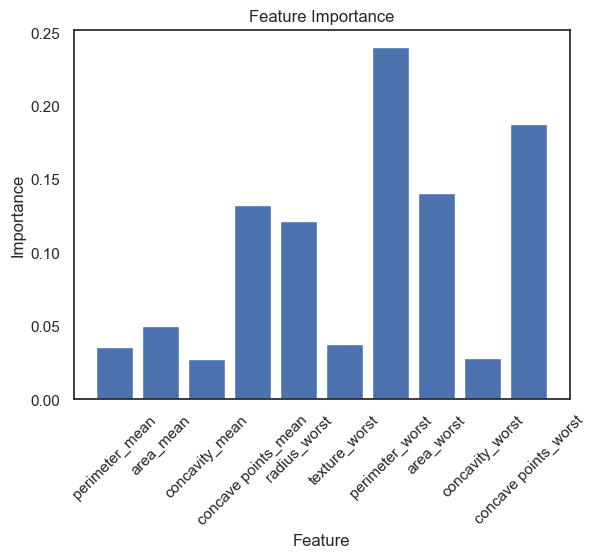

Reduced features:
1. perimeter_mean
2. area_mean
3. concavity_mean
4. concave points_mean
5. radius_worst
6. texture_worst
7. perimeter_worst
8. area_worst
9. concavity_worst
10. concave points_worst
Original dataset shape: (569, 30)
Reduced dataset shape: (569, 10)


In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Load the breast cancer wisconsin dataset into a Pandas DataFrame object
df = pd.read_csv('breast_cancer_data.csv')

# Convert diagnosis column to binary 0/1 values
y = df['diagnosis'].replace({'B': 0, 'M': 1}).values

# Drop columns that are not useful for prediction
df = df.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)

# Create a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create an RFE object with the Random Forest Classifier and select top 10 features
rfe = RFE(estimator=rf, n_features_to_select=10, step=1)

# Fit the RFE on the dataset
rfe.fit(df, y)

# Get the feature names and importance scores
feature_names = df.columns[rfe.support_]
feature_importance = rfe.estimator_.feature_importances_

# Create a bar chart to visualize feature importance
plt.bar(feature_names, feature_importance)

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Print the reduced feature names
print("Reduced features:")
for i, feature in enumerate(df.columns[rfe.support_]):
    print(f"{i+1}. {feature}")

# Transform the dataset to include only the most important features
X_new = rfe.transform(df)

# Print the shape of the original and reduced datasets
print(f"Original dataset shape: {df.shape}")
print(f"Reduced dataset shape: {X_new.shape}")


Index(['diagnosis', 'concave_points_worst', 'perimeter_worst',
       'concave_points_mean', 'radius_worst', 'perimeter_mean', 'area_worst',
       'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst'],
      dtype='object')


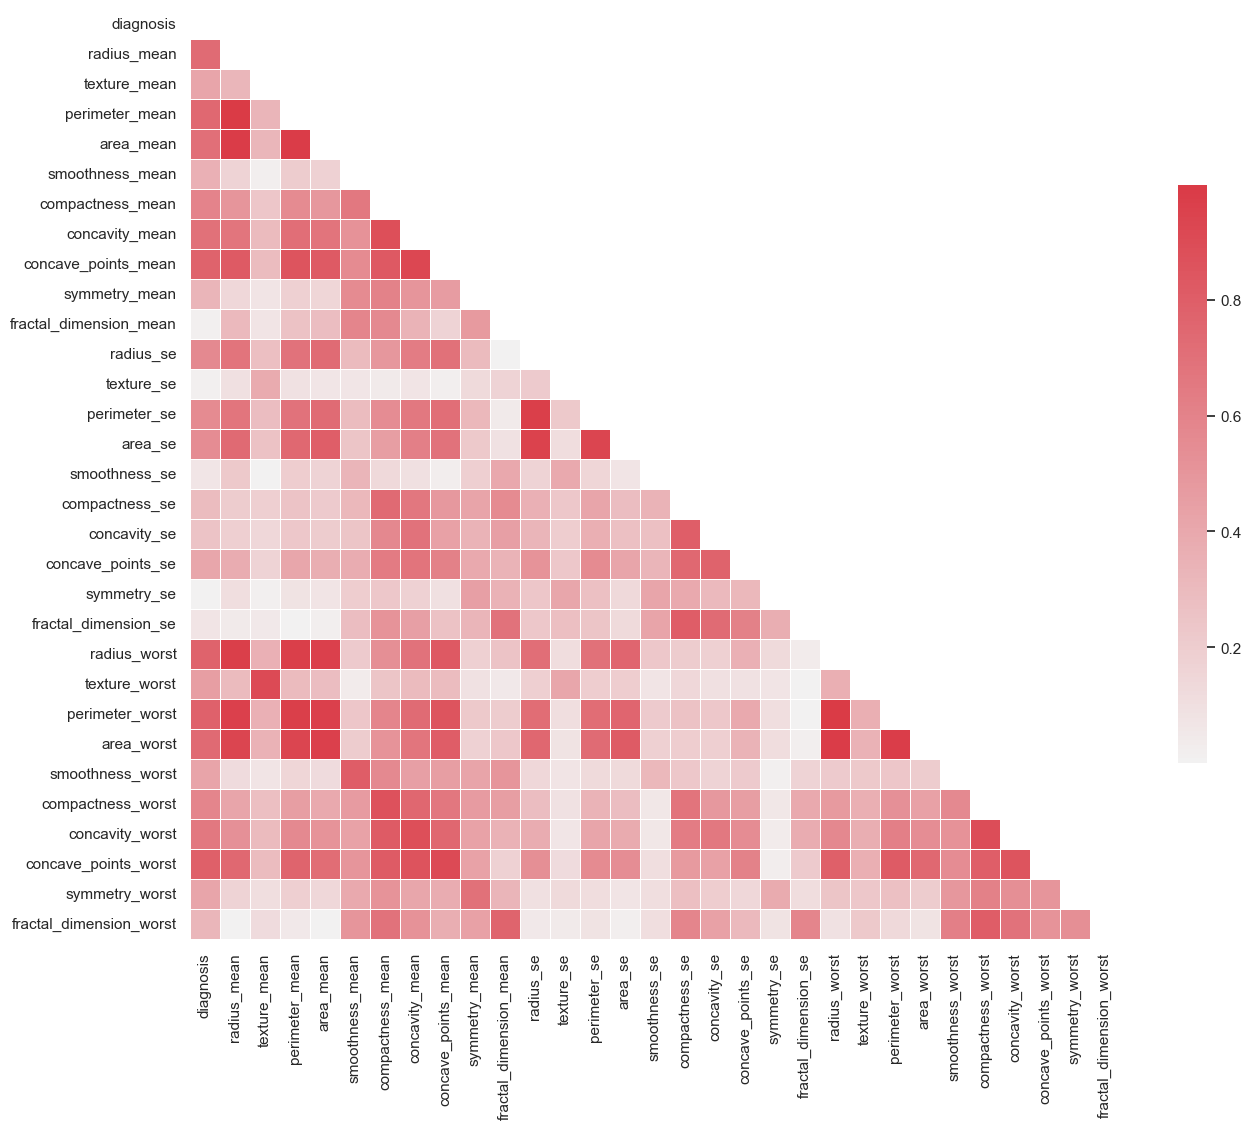

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data.csv')

# Drop the ID column
data = data.drop('id', axis=1)

# Convert the diagnosis column to binary values
data['diagnosis'] = np.where(data['diagnosis'] == 'M', 1, 0)

# Compute the correlation matrix
corr_matrix = data.corr().abs()
sns.set(style='white')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Select the top 16 most correlated features with diagnosis
selected_features_corr = corr_matrix.nlargest(11, 'diagnosis')['diagnosis'].index

# Print the selected features
print(selected_features_corr)

# Save the correlation matrix as an image file
plt.savefig('correlation_matrix.png')


In [4]:
from sklearn.feature_selection import SelectFromModel
# extract the feature names from the rules
selected_features = ['radius_worst', 'perimeter_worst', 'concave points_worst', 'concave points_mean', 'radius_mean', 'area_worst', 'concavity_mean', 'area_mean', 'area_se' ,'concavity_worst', 'perimeter_mean']
#selected_features = ['concave points_mean','radius_worst','texture_worst','concave points_worst','perimeter_worst','texture_mean','area_se','area_worst','concavity_mean','concavity_worst','radius_mean']
for rule in rules:
    if '->' in rule:
        feature = rule.split('->')[0].strip()
        if feature not in selected_features:
            selected_features.append(feature)

# select the important features using the SelectFromModel method
sfm = SelectFromModel(dt, prefit=True, max_features=len(selected_features))
X_selected = sfm.transform(X)

# print the selected feature names
feature_idx = sfm.get_support()
selected_features = SelectFromModel(dt, prefit=True, max_features=10).get_support(indices=True)
selected_features_names = [feature_names[i] for i in range(len(feature_names)) if feature_idx[i]]
print('Selected Features:', selected_features_names)
print('Selected Features:', selected_features)
print(X_selected)


Selected Features: ['perimeter_mean', 'perimeter_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst']
Selected Features: [ 2 22 24 26 27]
[[0.54598853 0.66831017 0.60113584 0.56861022 0.91202749]
 [0.61578329 0.53981772 0.34755332 0.19297125 0.63917526]
 [0.59574321 0.50844166 0.48358978 0.35974441 0.83505155]
 ...
 [0.44578813 0.3799492  0.28217658 0.27180511 0.48728522]
 [0.66553797 0.66831017 0.61962623 0.74976038 0.91065292]
 [0.02853984 0.04357787 0.12408374 0.         0.        ]]


In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
import numpy as np

# Load the breast cancer wisconsin dataset into a Pandas DataFrame object
df = pd.read_csv('breast_cancer_data.csv')

y = df['diagnosis'].replace({'B': 0, 'M': 1}).values

mylist = ['Unnamed: 32', 'id', 'diagnosis']

data = df.drop(mylist, axis=1)
selected_features_names = ['perimeter_mean', 'perimeter_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst']
selected_features = data[selected_features_names]
scaler = MinMaxScaler()
X = scaler.fit_transform(selected_features)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the random forest classifier with 1000 trees
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# fit the model on the training data
rf.fit(X_train, y_train)
print("Number of estimators:", len(rf.estimators_))

feature_names = selected_features.columns.tolist()

rules = ''
for i, dt in enumerate(rf.estimators_):
    rules += f"Rules for tree {i}:\n"
    rules += export_text(dt, feature_names=feature_names) + '\n'

# Display the decision tree rules
print(rules)

# Test rules
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# sum up the number of nodes in each decision tree in the forest
num_nodes = sum([estimator.tree_.node_count for estimator in rf.estimators_])

# print the number of nodes
print("Number of decisions:", num_nodes)

# from sklearn.tree import export_graphviz
# import graphviz

# dot_data = export_graphviz(rf.estimators_[0], out_file=None, 
#                            feature_names=feature_names,  
#                            class_names=['Benign', 'Malignant'],  
#                            filled=True, rounded=True,  
#                            special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph.render("decision_tree")  
# graph


Number of estimators: 200
Rules for tree 0:
|--- perimeter_mean <= 0.36
|   |--- perimeter_worst <= 0.26
|   |   |--- smoothness_worst <= 0.84
|   |   |   |--- concavity_worst <= 0.05
|   |   |   |   |--- perimeter_worst <= 0.17
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- perimeter_worst >  0.17
|   |   |   |   |   |--- perimeter_worst <= 0.18
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- perimeter_worst >  0.18
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- concavity_worst >  0.05
|   |   |   |   |--- class: 0.0
|   |   |--- smoothness_worst >  0.84
|   |   |   |--- class: 1.0
|   |--- perimeter_worst >  0.26
|   |   |--- concave points_worst <= 0.40
|   |   |   |--- class: 0.0
|   |   |--- concave points_worst >  0.40
|   |   |   |--- smoothness_worst <= 0.43
|   |   |   |   |--- perimeter_worst <= 0.29
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- perimeter_worst >  0.29
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- smoothn

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
import numpy as np

# Load the breast cancer wisconsin dataset into a Pandas DataFrame object
df = pd.read_csv('breast_cancer_data.csv')

y = df['diagnosis'].replace({'B': 0, 'M': 1}).values

mylist = ['Unnamed: 32', 'id', 'diagnosis']

data = df.drop(mylist, axis=1)
selected_features_names = ['perimeter_mean', 'perimeter_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst']
selected_features = data[selected_features_names]
scaler = MinMaxScaler()
X = scaler.fit_transform(selected_features)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the random forest classifier with 200 trees
rf = RandomForestClassifier(n_estimators=10, random_state=42)

# fit the model on the training data
rf.fit(X_train, y_train)

# get the rules for each decision tree in the random forest
rules_list = []
for dt in rf.estimators_:
    rules = export_text(dt, feature_names=selected_features_names)
    rules_list.append(rules)

# count the number of identical rules
num_same_rules = 0
for i in range(len(rules_list)):
    for j in range(i+1, len(rules_list)):
        if rules_list[i] == rules_list[j]:
            num_same_rules += 1

print("Number of identical rules:", num_same_rules)


Number of identical rules: 0


SVM Classifier Accuracy: 0.9473684210526315
SVM Classifier Precision: 0.9302325581395349
SVM Classifier F1 Score: 0.9302325581395349
SVM Classifier Confusion Matrix:
[[68  3]
 [ 3 40]]


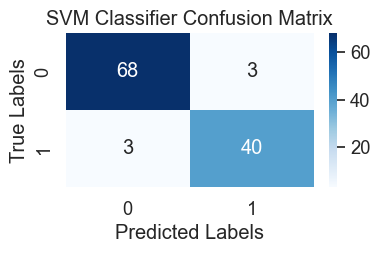

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.tree import export_text
from sklearn.svm import SVC
import seaborn as sns
#Load the breast cancer wisconsin dataset into a Pandas DataFrame object



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Create the random forest classifier with 200 trees

rf = RandomForestClassifier(n_estimators=200, random_state=42)
#Fit the model on the training data

rf.fit(X_train, y_train)

#Evaluate the performance of the random forest classifier on the test data

y_pred_rf = rf.predict(X_test)
#Create the SVM classifier

svm = SVC(kernel='linear', random_state=42)
#Fit the model on the training data

svm.fit(X_train, y_train)
#Evaluate the performance of the SVM classifier using the rules generated by the random forest classifier

# Evaluate the performance of the SVM classifier using the rules generated by the random forest classifier
y_pred_svm = []
for i in range(len(X_test)):
    rules_matched = []
    for j, dt in enumerate(rf.estimators_):
        if dt.predict([X_test[i]])[0] == svm.predict([X_test[i]])[0]:
            rules_matched.append(j)
    if len(rules_matched) == 0:
        y_pred_svm.append(rf.predict([X_test[i]])[0])
    else:
        votes = []
        for k in rules_matched:
            votes.append(svm.predict([X_test[i]])[0])
        y_pred_svm.append(max(set(votes), key=votes.count))


accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('SVM Classifier Accuracy:', accuracy_svm)
precision_svm = precision_score(y_test, y_pred_svm)
print('SVM Classifier Precision:', precision_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print('SVM Classifier F1 Score:', f1_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print('SVM Classifier Confusion Matrix:')
print(cm_svm)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 2))
sns.set(font_scale=1.2)
sns.heatmap(cm_svm, annot=True, cmap='Blues')
plt.title('SVM Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Epoch 1/50
15/15 [==============================] - 2s 6ms/step - loss: 0.6848 - accuracy: 0.6220
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.8571
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.6111 - accuracy: 0.8813
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.8923
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4959 - accuracy: 0.8901
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.9011
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3690 - accuracy: 0.9011
Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3160 - accuracy: 0.9099
Epoch 9/50
15/15 [==============================] - 0s 4ms/step - loss: 0.2778 - accuracy: 0.9099
Epoch 10/50
15/15 [==============================] - 0s 3ms/step - loss: 0.2541 - accuracy: 0.9143
Epoch 11/50
15/15 [

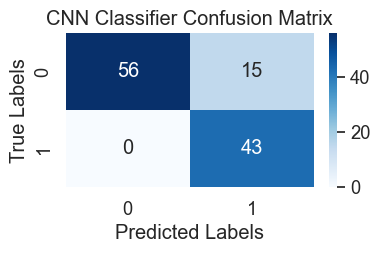

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.tree import export_text
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
import seaborn as sns
#Load the breast cancer wisconsin dataset into a Pandas DataFrame object


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Create the random forest classifier with 200 trees

rf = RandomForestClassifier(n_estimators=15, random_state=42)
#Fit the model on the training data

rf.fit(X_train, y_train)
#Generate rules from random forest classifier



model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(5,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#Compile the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#Fit the DNN model on the training data

model.fit(X_train, y_train, epochs=50, batch_size=32)
#Evaluate the performance of the DNN model on the test data

_, accuracy_dnn = model.evaluate(X_test, y_test)
#Use the rules generated by the random forest classifier to predict labels

y_pred_rules = []
for i in range(len(X_test)):
    rules_matched = []
    for j, dt in enumerate(rf.estimators_):
        if dt.predict([X_test[i]])[0] == 1:
            rules_matched.append(j)
    if len(rules_matched) > 0:
        y_pred_rules.append(1)
    else:
        y_pred_rules.append(0)
#Evaluate the performance of the rules generated by the random forest classifier on the test data

cnn_accuracy = accuracy_score(y_test, y_pred_rules)
precision_rules = precision_score(y_test, y_pred_rules)
f1_rules = f1_score(y_test, y_pred_rules)
confusion_matrix_rules = confusion_matrix(y_test, y_pred_rules)
#Print the evaluation metrics

print('Rules Accuracy:', cnn_accuracy)
print('Rules Precision:', precision_rules)
print('Rules F1-Score:', f1_rules)
print('Rules Confusion Matrix:\n', confusion_matrix_rules)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 2))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_rules, annot=True, cmap='Blues')
plt.title('CNN Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



MLP Classifier Accuracy with rules: 0.956140350877193
MLP Classifier Precision with rules: 0.9318181818181818
MLP Classifier F1 Score with rules: 0.942528735632184
MLP Classifier Confusion Matrix with rules:
[[68  3]
 [ 2 41]]
MLP: 0.956140350877193


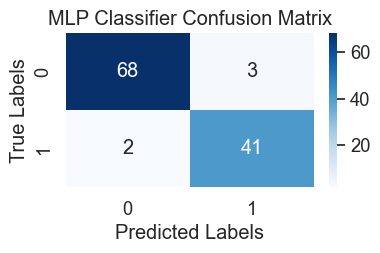

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.tree import export_text
from sklearn.neural_network import MLPClassifier

#

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest classifier with 200 trees
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)


# Create the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Fit the MLP classifier on the training data
mlp.fit(X_train, y_train)

# Evaluate the performance of the MLP classifier on the test data
y_pred_mlp = mlp.predict(X_test)

# Use the rules generated by the random forest classifier to predict labels
y_pred_rules = []
for i in range(len(X_test)):
    rules_matched = []
    for j, dt in enumerate(rf.estimators_):
        if dt.predict([X_test[i]])[0] == mlp.predict([X_test[i]])[0]:
            rules_matched.append(j)
    if len(rules_matched) == 0:
        y_pred_rules.append(rf.predict([X_test[i]])[0])
    else:
        votes = []
        for k in rules_matched:
            votes.append(mlp.predict([X_test[i]])[0])
        y_pred_rules.append(max(set(votes), key=votes.count))

# Evaluate the performance of the MLP classifier using the rules generated by the random forest classifier
accuracy_rules = accuracy_score(y_test, y_pred_rules)
print('MLP Classifier Accuracy with rules:', accuracy_rules)

precision_rules = precision_score(y_test, y_pred_rules)
print('MLP Classifier Precision with rules:', precision_rules)

f1_rules = f1_score(y_test, y_pred_rules)
print('MLP Classifier F1 Score with rules:', f1_rules)

cm_rules = confusion_matrix(y_test, y_pred_rules)
print('MLP Classifier Confusion Matrix with rules:')
print(cm_rules)
# Print the decision rules accuracy
correct = 0
total = len(X_test)
for i in range(len(X_test)):
    rules_matched = []
    for j, dt in enumerate(rf.estimators_):
        if dt.predict([X_test[i]])[0] == mlp.predict([X_test[i]])[0]:
            rules_matched.append(j)
    if len(rules_matched) == 0:
        if rf.predict([X_test[i]])[0] == y_test[i]:
            correct += 1
    else:
        votes = []
        for k in rules_matched:
            votes.append(mlp.predict([X_test[i]])[0])
        if max(set(votes), key=votes.count) == y_test[i]:
            correct += 1

MLP_accuracy = correct/total
print('MLP:', MLP_accuracy)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 2))
sns.set(font_scale=1.2)
sns.heatmap(cm_rules, annot=True, cmap='Blues')
plt.title('MLP Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



Gradient Boosting Classifier Accuracy: 0.9385964912280702
Gradient Boosting Classifier Precision: 0.9285714285714286
Gradient Boosting Classifier F1 Score: 0.9176470588235294
Gradient Boosting Classifier Confusion Matrix:
[[68  3]
 [ 4 39]]


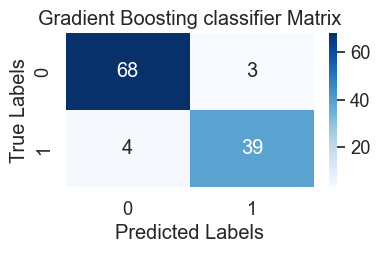

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.tree import export_text



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest classifier with 200 trees
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)



# Evaluate the performance of the random forest classifier on the test data
y_pred_rf = rf.predict(X_test)



# Create the gradient boosting classifier with 200 trees
gb = GradientBoostingClassifier(n_estimators=200, random_state=42)

# Fit the model on the training data
gb.fit(X_train, y_train)


# Evaluate the performance of the gradient boosting classifier using the rules generated by the random forest classifier
y_pred_gb = []
for i in range(len(X_test)):
    rules_matched = []
    for j, dt in enumerate(rf.estimators_):
        if dt.predict([X_test[i]])[0] == gb.estimators_[j][0].predict([X_test[i]])[0]:
            rules_matched.append(j)
    if len(rules_matched) == 0:
        y_pred_gb.append(rf.predict([X_test[i]])[0])
    else:
        votes = []
        for k in rules_matched:
            votes.append(gb.estimators_[k][0].predict([X_test[i]])[0])
        y_pred_gb.append(max(set(votes), key=votes.count))

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print('Gradient Boosting Classifier Accuracy:', accuracy_gb)

precision_gb = precision_score(y_test, y_pred_gb)
print('Gradient Boosting Classifier Precision:', precision_gb)

f1_gb = f1_score(y_test, y_pred_gb)
print('Gradient Boosting Classifier F1 Score:', f1_gb)

cm_gb = confusion_matrix(y_test, y_pred_gb)
print('Gradient Boosting Classifier Confusion Matrix:')
print(cm_gb)


# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 2))
sns.set(font_scale=1.2)
sns.heatmap(cm_gb, annot=True, cmap='Blues')
plt.title('Gradient Boosting classifier Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


AdaBoost Classifier Accuracy: 0.9473684210526315
AdaBoost Classifier Precision: 0.9302325581395349
AdaBoost Classifier F1 Score: 0.9302325581395349
AdaBoost Classifier Confusion Matrix:
 [[68  3]
 [ 3 40]]


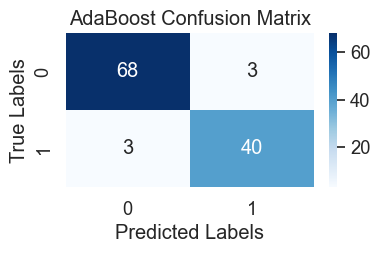

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.tree import export_text


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest classifier with 200 trees
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)





# Create the AdaBoost classifier with 200 trees
ab = AdaBoostClassifier(n_estimators=200, random_state=42)

# Fit the model on the training data
ab.fit(X_train, y_train)

# Evaluate the performance of the AdaBoost classifier using the rules generated by the random forest classifier
y_pred_ab = []
for i in range(len(X_test)):
    rules_matched = []
    for j, dt in enumerate(rf.estimators_):
        if dt.predict([X_test[i]])[0] == ab.estimators_[j].predict([X_test[i]])[0]:
            rules_matched.append(j)
    if len(rules_matched) == 0:
        y_pred_ab.append(rf.predict([X_test[i]])[0])
    else:
        votes = []
        for k in rules_matched:
            votes.append(ab.estimators_[k].predict([X_test[i]])[0])
        y_pred_ab.append(max(set(votes), key=votes.count))

# Evaluate the performance of the AdaBoost classifier on the test data
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print('AdaBoost Classifier Accuracy:', accuracy_ab)

precision_ab = precision_score(y_test, y_pred_ab)
print('AdaBoost Classifier Precision:', precision_ab)

f1_ab = f1_score(y_test, y_pred_ab)
print('AdaBoost Classifier F1 Score:', f1_ab)

# Calculate the confusion matrix for the random forest classifier
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
# Calculate the confusion matrix for the AdaBoost classifier
confusion_mat_ab = confusion_matrix(y_test, y_pred_ab)
print('AdaBoost Classifier Confusion Matrix:\n', confusion_mat_ab)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 2))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat_ab, annot=True, cmap='Blues')
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Extra Trees Classifier Accuracy: 0.9473684210526315
Extra Trees Classifier Precision: 0.9302325581395349
Extra Trees Classifier F1 Score: 0.9302325581395349
Extra Trees Classifier Confusion Matrix:
[[68  3]
 [ 3 40]]


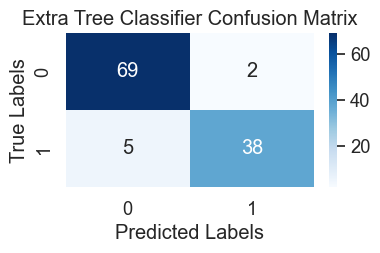

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.tree import export_text



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create the random forest classifier with 200 trees
# rf = RandomForestClassifier(n_estimators=200, random_state=42)

# # Fit the model on the training data
# rf.fit(X_train, y_train)

# feature_names = selected_features.columns.tolist()

# rules_rf = ''
# for i, dt in enumerate(rf.estimators_):
#     rules_rf += f"Rules for tree {i}:\n"
#     rules_rf += export_text(dt, feature_names=feature_names) + '\n'

# # Evaluate the performance of the random forest classifier on the test data
# y_pred_rf = rf.predict(X_test)

# Create the Extra Trees classifier
et = ExtraTreesClassifier(random_state=42)

# Fit the model on the training data
et.fit(X_train, y_train)

# Evaluate the performance of the Extra Trees classifier using the rules generated by the random forest classifier
y_pred_et = []
for i in range(len(X_test)):
    rules_matched = []
    for j, dt in enumerate(rf.estimators_):
        if dt.predict([X_test[i]])[0] == et.predict([X_test[i]])[0]:
            rules_matched.append(j)
    if len(rules_matched) == 0:
        y_pred_et.append(rf.predict([X_test[i]])[0])
    else:
        votes = []
        for k in rules_matched:
            votes.append(et.predict([X_test[i]])[0])
        y_pred_et.append(max(set(votes), key=votes.count))

# Evaluate the performance of the Extra Trees classifier
accuracy_et = accuracy_score(y_test, y_pred_et)


precision_et = precision_score(y_test, y_pred_et)


f1_et = f1_score(y_test, y_pred_et)


cm_et = confusion_matrix(y_test, y_pred_et)





cm_et = confusion_matrix(y_test, y_pred_et)
print('Extra Trees Classifier Accuracy:', accuracy_et)
print('Extra Trees Classifier Precision:', precision_et)
print('Extra Trees Classifier F1 Score:', f1_et)
print('Extra Trees Classifier Confusion Matrix:')
print(cm_et)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 2))
sns.set(font_scale=1.2)
sns.heatmap(cm_logreg, annot=True, cmap='Blues')
plt.title('Extra Tree Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Logistic Regression Classifier Accuracy: 0.9385964912280702
Logistic Regression Classifier Precision: 0.95
Logistic Regression Classifier F1 Score: 0.9156626506024096
Logistic Regression Classifier Confusion Matrix:
[[69  2]
 [ 5 38]]


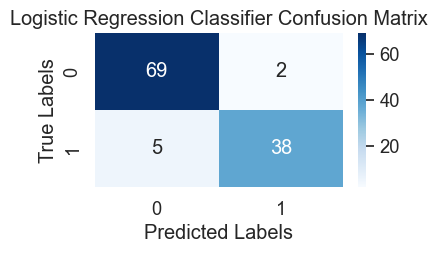

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.tree import export_text
from sklearn.linear_model import LogisticRegression



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest classifier with 200 trees
rf = RandomForestClassifier(n_estimators=300, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)


# Evaluate the performance of the random forest classifier on the test data
y_pred_rf = rf.predict(X_test)

# Create the logistic regression classifier
logreg = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Evaluate the performance of the logistic regression classifier using the rules generated by the random forest classifier
y_pred_logreg = []
for i in range(len(X_test)):
    rules_matched = []
    for j, dt in enumerate(rf.estimators_):
        if dt.predict([X_test[i]])[0] == logreg.predict([X_test[i]])[0]:
            rules_matched.append(j)
    if len(rules_matched) == 0:
        y_pred_logreg.append(rf.predict([X_test[i]])[0])
    else:
        votes = []
        for k in rules_matched:
            votes.append(logreg.predict([X_test[i]])[0])
        y_pred_logreg.append(max(set(votes), key=votes.count))

# Evaluate the performance of the logistic regression classifier
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
#print('Logistic Regression Classifier Accuracy:', accuracy_logreg)

precision_logreg = precision_score(y_test, y_pred_logreg)

f1_logreg = f1_score(y_test, y_pred_logreg)


cm_logreg = confusion_matrix(y_test, y_pred_logreg)





cm_logreg = confusion_matrix(y_test, y_pred_logreg)

print('Logistic Regression Classifier Accuracy:', accuracy_logreg)
print('Logistic Regression Classifier Precision:', precision_logreg)
print('Logistic Regression Classifier F1 Score:', f1_logreg)
print('Logistic Regression Classifier Confusion Matrix:')
print(cm_logreg)
plt.figure(figsize=(4, 2))
sns.set(font_scale=1.2)
sns.heatmap(cm_logreg, annot=True, cmap='Blues')
plt.title('Logistic Regression Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


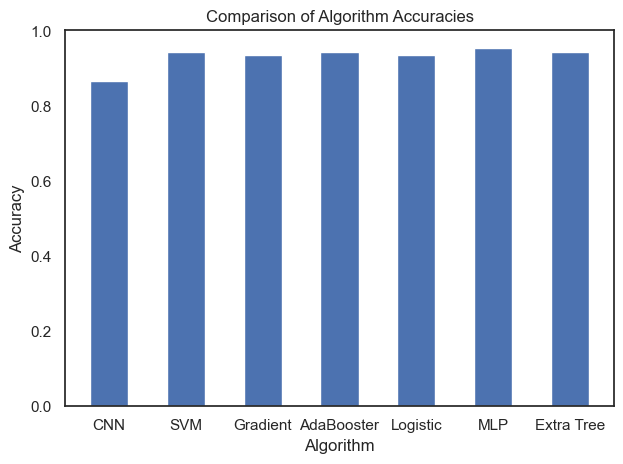

In [25]:
import matplotlib.pyplot as plt

# Create a bar chart
labels = ['CNN', 'SVM', 'Gradient','AdaBooster','Logistic','MLP','Extra Tree']
accuracy = [cnn_accuracy, accuracy_svm, accuracy_gb,accuracy_ab,accuracy_logreg,MLP_accuracy,accuracy_et]

# Set the width and spacing of the bars
bar_width = 0.5
spacing = 0.5
n_bars = len(labels)
total_width = n_bars * bar_width + (n_bars - 1) * spacing

# Create the plot
fig, ax = plt.subplots()
rects = ax.bar(labels, accuracy, width=bar_width)

# Set the x-axis label, y-axis label, and title
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Algorithm Accuracies')

# Set the x-axis ticks and tick labels
ax.set_xticks([i * (bar_width + spacing) for i in range(n_bars)])
ax.set_xticklabels(labels)

# Show the plot
fig.tight_layout()
plt.show()


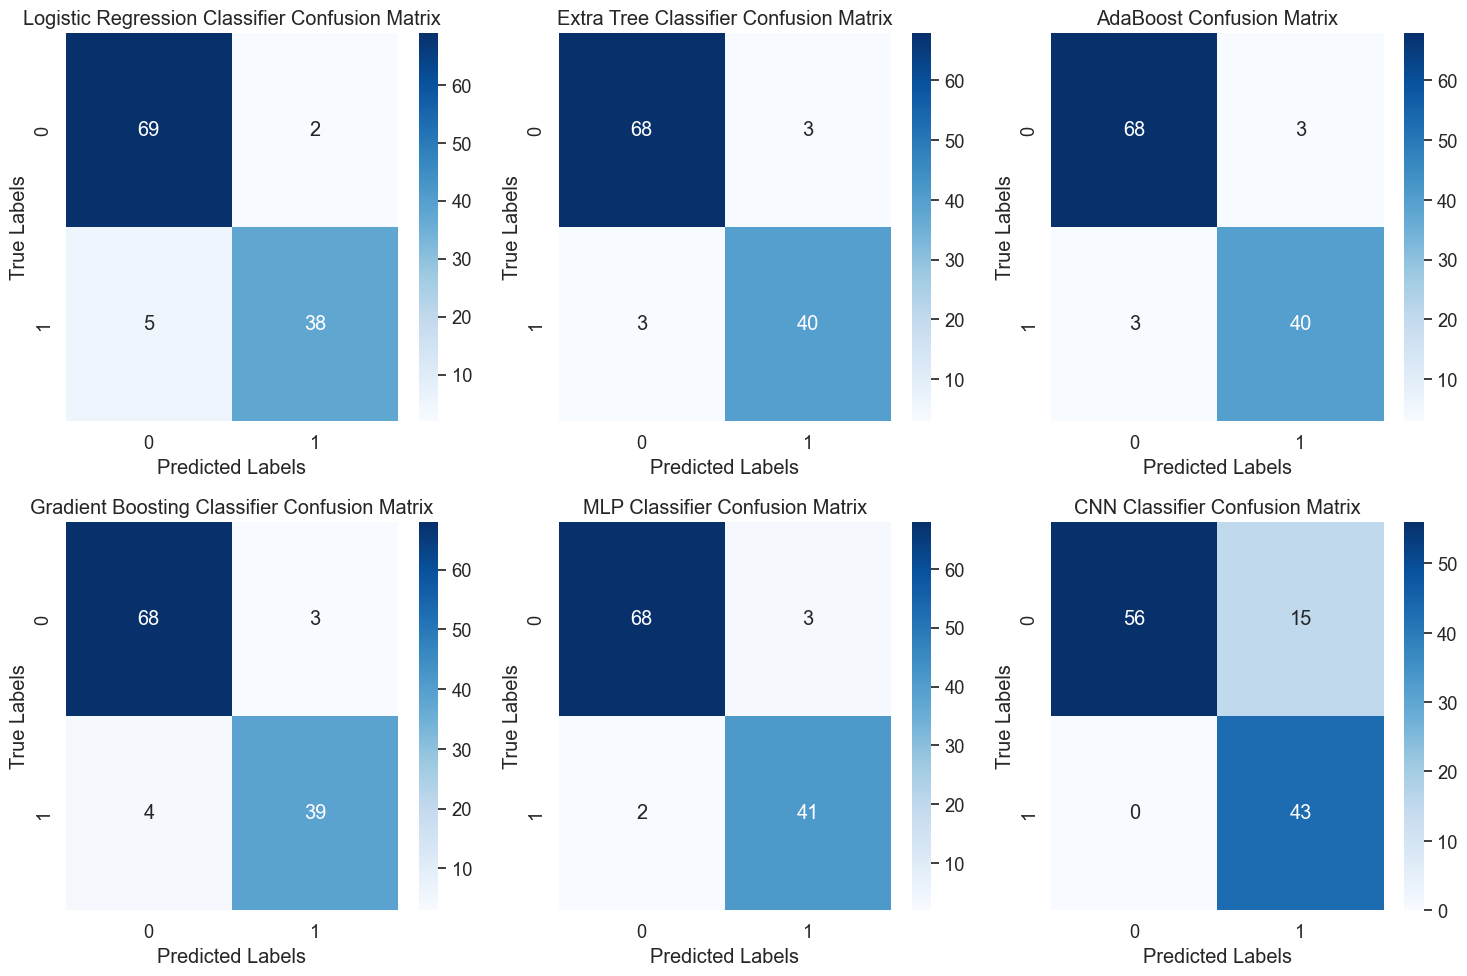

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot confusion matrix for Logistic Regression Classifier
sns.heatmap(cm_logreg, annot=True, cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Logistic Regression Classifier Confusion Matrix')
axes[0,0].set_xlabel('Predicted Labels')
axes[0,0].set_ylabel('True Labels')

# Plot confusion matrix for Extra Tree Classifier
sns.heatmap(cm_et, annot=True, cmap='Blues', ax=axes[0,1])
axes[0,1].set_title('Extra Tree Classifier Confusion Matrix')
axes[0,1].set_xlabel('Predicted Labels')
axes[0,1].set_ylabel('True Labels')

# Plot confusion matrix for AdaBoost Classifier
sns.heatmap(confusion_mat_ab, annot=True, cmap='Blues', ax=axes[0,2])
axes[0,2].set_title('AdaBoost Confusion Matrix')
axes[0,2].set_xlabel('Predicted Labels')
axes[0,2].set_ylabel('True Labels')

# Plot confusion matrix for Gradient Boosting Classifier
sns.heatmap(cm_gb, annot=True, cmap='Blues', ax=axes[1,0])
axes[1,0].set_title('Gradient Boosting Classifier Confusion Matrix')
axes[1,0].set_xlabel('Predicted Labels')
axes[1,0].set_ylabel('True Labels')

# Plot confusion matrix for MLP Classifier
sns.heatmap(cm_rules, annot=True, cmap='Blues', ax=axes[1,1])
axes[1,1].set_title('MLP Classifier Confusion Matrix')
axes[1,1].set_xlabel('Predicted Labels')
axes[1,1].set_ylabel('True Labels')

# Plot confusion matrix for CNN Classifier
sns.heatmap(confusion_matrix_rules, annot=True, cmap='Blues', ax=axes[1,2])
axes[1,2].set_title('CNN Classifier Confusion Matrix')
axes[1,2].set_xlabel('Predicted Labels')
axes[1,2].set_ylabel('True Labels')


# Create space between subplots
plt.tight_layout()

# Show the plot

plt.show()
# Save the figure in high resolution
fig.savefig('confusion_matrix.png', dpi=300)
